In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [21]:
import requests, bs4
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote
import json

In [22]:
KEY = '2ct202pt2_e_r2otjt_8j288j2to3b82'

In [23]:
# # URL 파라미터 분리하기
# xmlUrl = 'https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/'

# My_API_Key = unquote(KEY)

# DF = pd.DataFrame()  # Dataframe to store all data

# marketType_list = ['교통', '소매', '쇼핑', '숙박', '유흥', '문화/레져', '식음료']

# sigungu_list = ['제주시', '서귀포시']

# cityGubun_list = ['도심', '읍면']

# endDate_list = ['201609','201610','201611','201612','201701','201702','201703','201704','201705','201706','201707',
#                 '201708','201709','201710','201711','201712','201801','201802','201803','201804','201805','201806',
#                 '201807','201808','201809','201810','201811','201812']

# for marketType in tqdm(marketType_list):
#   for sigungu in sigungu_list:
#     for cityGubun in cityGubun_list:
#       for endDate in endDate_list:
#         queryParams = '?' + urlencode(    # get 방식으로 쿼리를 분리하기 위해 '?'를 넣은 것이다. 메타코드 아님.
#             {
#                 quote_plus('startDate') : '201609',
#                 quote_plus('endDate') : endDate,
#                 quote_plus('sigungu') : sigungu,
#                 quote_plus('cityGubun'): cityGubun,
#                 quote_plus('userType') : '내국인관광객',
#                 quote_plus('marketType') : marketType
#             }
#         )

#         response = requests.get(xmlUrl + My_API_Key + queryParams).text.encode('utf-8')
#         xmlobj = bs4.BeautifulSoup(response, 'html.parser')
#         xmlobj_str = str(xmlobj)
#         raw_json = json.loads(xmlobj_str)
#         raw_data = raw_json['data']

#         for item in raw_data:
#           # DF = DF.append(pd.DataFrame([item])).reset_index(drop=True)
#           DF = pd.concat([DF, pd.DataFrame([item])], ignore_index=True) # df append 오류나면 concat

In [24]:
# DF.to_csv('jeju_card_data.csv', encoding='utf-8', index=False)

In [25]:
DATA = pd.read_csv('jeju_card_data.csv')

In [26]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sido         7840 non-null   object
 1   sigungu      7840 non-null   object
 2   cityGubun    7840 non-null   object
 3   marketType   7840 non-null   object
 4   userType     7840 non-null   object
 5   ageGroup     7840 non-null   object
 6   gender       7840 non-null   object
 7   dtYearMonth  7840 non-null   int64 
 8   userCount    7840 non-null   int64 
 9   useCount     7840 non-null   int64 
 10  useCost      7840 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 673.9+ KB


In [27]:
DATA['dtYearMonth'] = pd.to_datetime(DATA['dtYearMonth'], format='%Y%m', errors='coerce').dropna()
DATA['avgCost'] = round(DATA['useCost']/DATA['userCount'])
DATA['avgCost'] = DATA['avgCost'].astype(int)
DATA = DATA[DATA['ageGroup']!='20대미만']

In [28]:
agg_DATA = DATA.groupby(['marketType', 'ageGroup', 'dtYearMonth']).sum()
agg_DATA['avgCost'] = round(agg_DATA)['useCost']/agg_DATA['userCount'] 
agg_DATA['avgCost'] = agg_DATA['avgCost'].astype(int)
agg_DATA = agg_DATA.reset_index()


In [29]:
agg_DATA = agg_DATA.drop(['sido', 'sigungu', 'cityGubun', 'userType', 'gender'], axis=1)
agg_DATA

,marketType,ageGroup,dtYearMonth,userCount,useCount,useCost,avgCost
0,교통,20대,2016-09-01,17069,19573,914534695,53578
1,교통,20대,2016-10-01,14395,16826,867898227,60291
2,교통,20대,2016-11-01,13696,16141,967987781,70676
3,교통,20대,2016-12-01,16179,19196,1248136374,77145
4,교통,20대,2017-01-01,15902,18865,1325270800,83339
...,...,...,...,...,...,...,...
902,유흥,60대이상,2018-08-01,547,753,98334750,179771
903,유흥,60대이상,2018-09-01,576,789,130342650,226289
904,유흥,60대이상,2018-10-01,633,848,130031805,205421
905,유흥,60대이상,2018-11-01,694,900,135576600,195355


In [30]:
agg_DATA.describe()

,dtYearMonth,userCount,useCount,useCost,avgCost
count,907,907.000000,907.000000,9.070000e+02,907.000000
mean,2017-09-27 16:32:16.934950144,25489.592062,40227.541345,1.519510e+09,91143.681367
min,2016-09-01 00:00:00,48.000000,55.000000,3.783800e+06,24023.000000
25%,2017-03-01 00:00:00,5633.500000,7398.500000,5.300313e+08,54650.500000
50%,2017-09-01 00:00:00,15357.000000,19430.000000,1.126238e+09,72977.000000
75%,2018-05-01 00:00:00,31361.500000,42612.500000,2.038619e+09,115973.500000
max,2018-12-01 00:00:00,147678.000000,234778.000000,6.313491e+09,263112.000000
std,NaN,28399.096848,50108.612264,1.300093e+09,53535.324944


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [32]:
# 연령대
ageGroup = list(agg_DATA['ageGroup'].unique())
ageGroup

['20대', '30대', '40대', '50대', '60대이상']

In [33]:
# 카드이용시장
marketType = list(agg_DATA['marketType'].unique())
marketType

['교통', '문화/레져', '소매', '쇼핑', '숙박', '식음료', '유흥']

In [34]:
# 군집분석
km_list = [] # 모형들 저장 
pred_list = [] # 클러스터링 결과들 저장

for market in marketType:
    avgCost_list = []

    for age in ageGroup:
        avgCost_list.append(list(agg_DATA[(agg_DATA['marketType']==market) & (agg_DATA['ageGroup']==age)]['avgCost']))
    
    x = to_time_series_dataset(avgCost_list)

    km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, random_state=0)
    pred = km.fit_predict(x)

    pred_list.append(pred)
    km_list.append(km)

    print(f'{market}에 대한 클러스터링 결과:\n'
        f'20대: 군집{pred[0]} / 30대: 군집 {pred[1]}/ 40대 군집 {pred[2]}/ 50대 군집 {pred[3]}/ 60대이상 {pred[4]}\n')
    

교통에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 0/ 40대 군집 0/ 50대 군집 0/ 60대이상 0

문화/레져에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 1/ 50대 군집 0/ 60대이상 0

소매에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 1/ 50대 군집 0/ 60대이상 0

쇼핑에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 1/ 50대 군집 0/ 60대이상 0

숙박에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 0/ 50대 군집 0/ 60대이상 0

식음료에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 0/ 50대 군집 0/ 60대이상 0

유흥에 대한 클러스터링 결과:
20대: 군집1 / 30대: 군집 1/ 40대 군집 0/ 50대 군집 0/ 60대이상 0



In [40]:
def plot_market_agg(DATA, marketType, km, pred):
  temp = agg_DATA[agg_DATA['marketType']==marketType].reset_index(drop=True)[['dtYearMonth','ageGroup','avgCost']]  # 해당 시장의 데이터

  dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)  # 일수를 추출
  ageGroup = ['군집 0']*len(dtYearMonth)  
  avgCost = list(km.cluster_centers_[0].ravel())  

  temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns =['dtYearMonth', 'ageGroup', 'avgCost'])
  temp = pd.concat([temp, temp_df]).reset_index(drop=True)  

  dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)  # 일수를 추출
  ageGroup = ['군집 1']*len(dtYearMonth) 
  avgCost = list(km.cluster_centers_[1].ravel())  

  temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns =['dtYearMonth', 'ageGroup', 'avgCost'])
  temp = pd.concat([temp, temp_df]).reset_index(drop=True)  

  cmap = sns.color_palette("bright")
  palette = {key:value for key,value in zip(temp['ageGroup'].unique(), cmap)}
  palette['군집 0'] = 'black'
  palette['군집 1'] = 'brown'

  sns.set(font_scale = 1.5)
  plt.rc("font", family = "Malgun Gothic") 
  plt.figure(figsize=(20, 8))
  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost", 
                    hue='ageGroup', palette=palette, ci=None, style='ageGroup', alpha=0.4)  # alpha를 통해 색의 투명도를 조정
  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost", 
              hue='ageGroup', palette=palette, ci=None, style='ageGroup', alpha=1)  # alpha를 통해 색의 투명도를 조정
  ax.set_title(f'연령대별 {marketType}에서의 평균이용금액과 군집별 평균\n'
               f'20대: 군집 {pred[0]} / 30대: 군집 {pred[1]} / 40대: 군집 {pred[2]} / 50대: 군집 {pred[3]} / 60대이상: 군집 {pred[4]}', fontsize=20)
  plt.xticks(rotation=45, size=12, fontweight='light')
  mytime = mdates.DateFormatter('%Y-%m')  
  ax.xaxis.set_major_formatter(mytime)
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  ax.set_ylabel('평균이용금액(원)');  
  ax.set_xlabel('시간');  
  ax.legend(title='연령대')
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


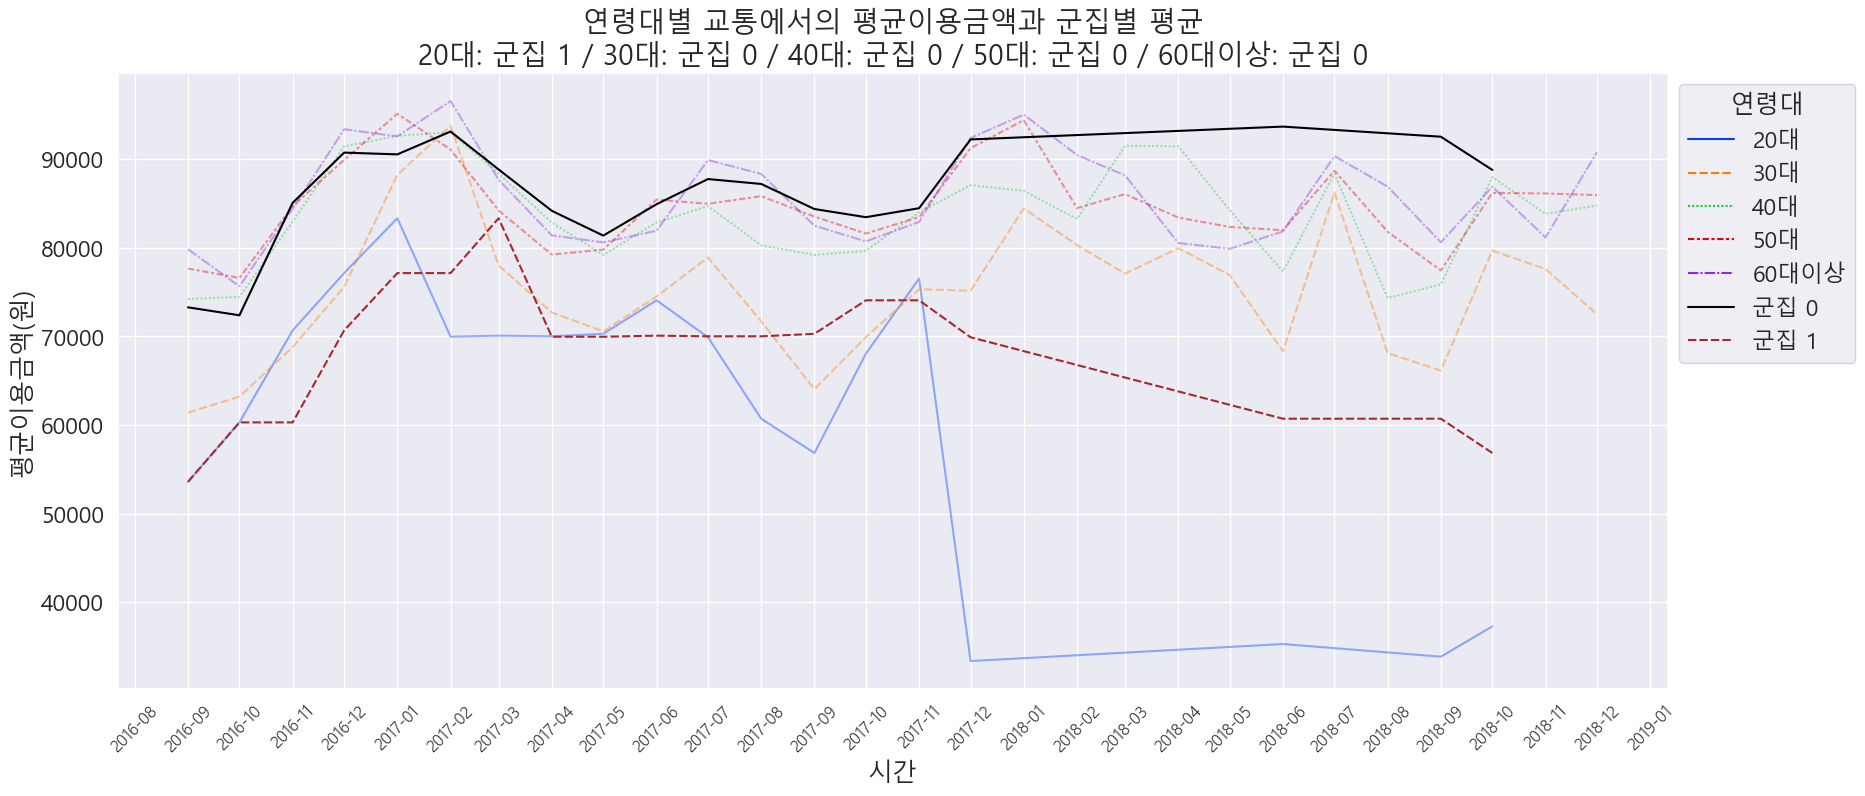

In [41]:
plot_market_agg(agg_DATA, marketType[0], km_list[0], pred_list[0])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


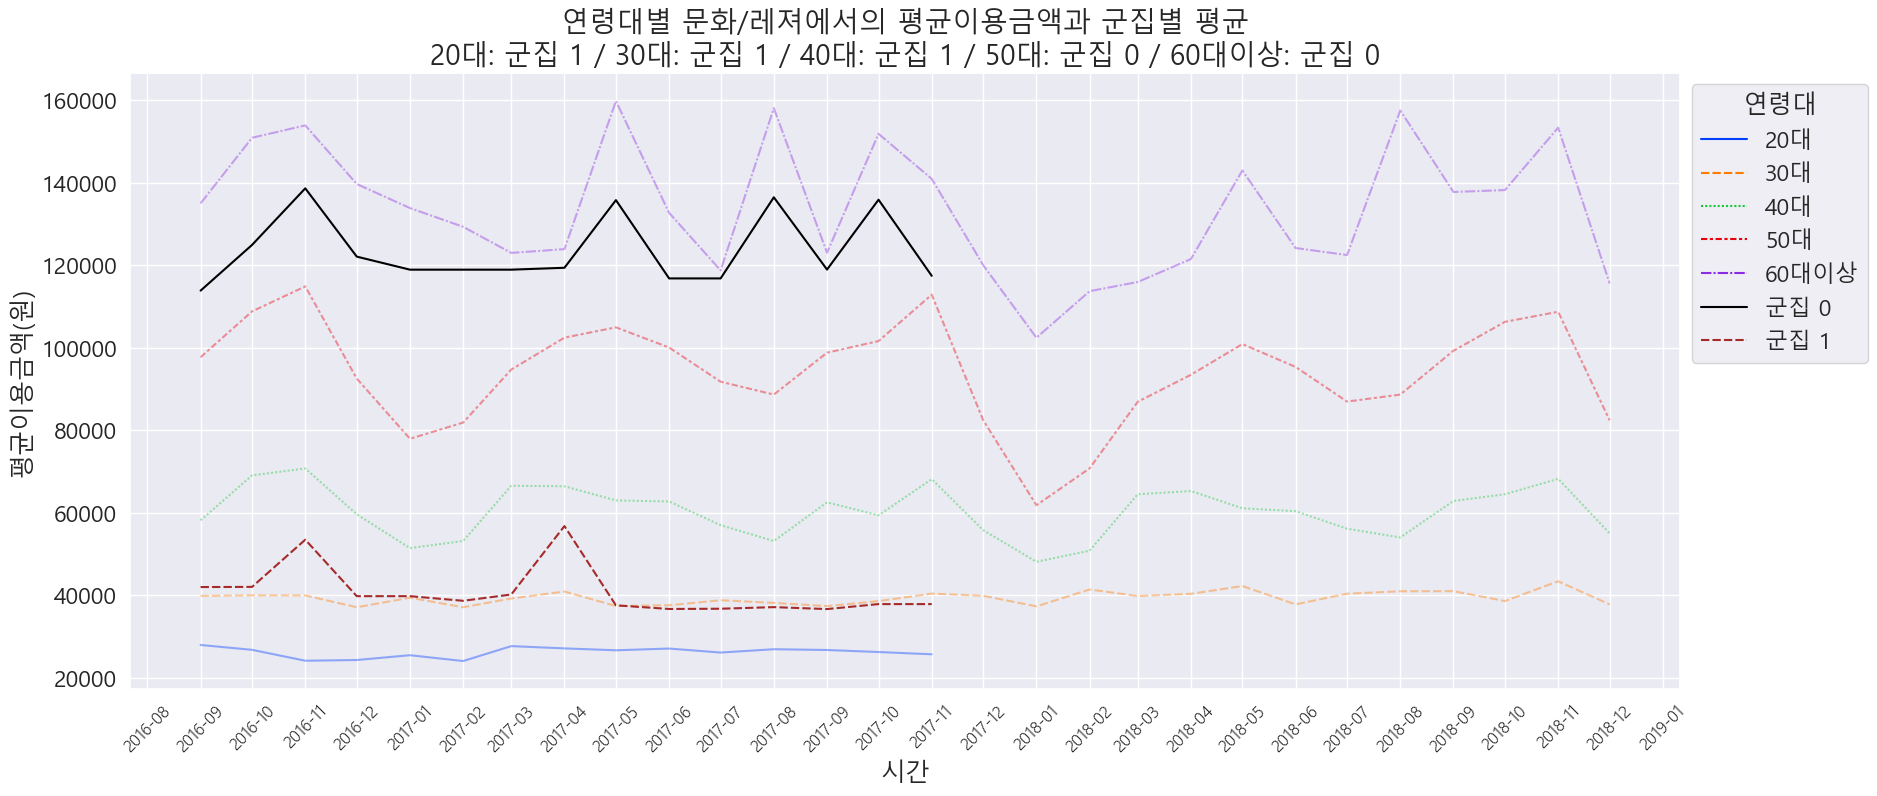

In [42]:
plot_market_agg(agg_DATA, marketType[1], km_list[1], pred_list[1])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


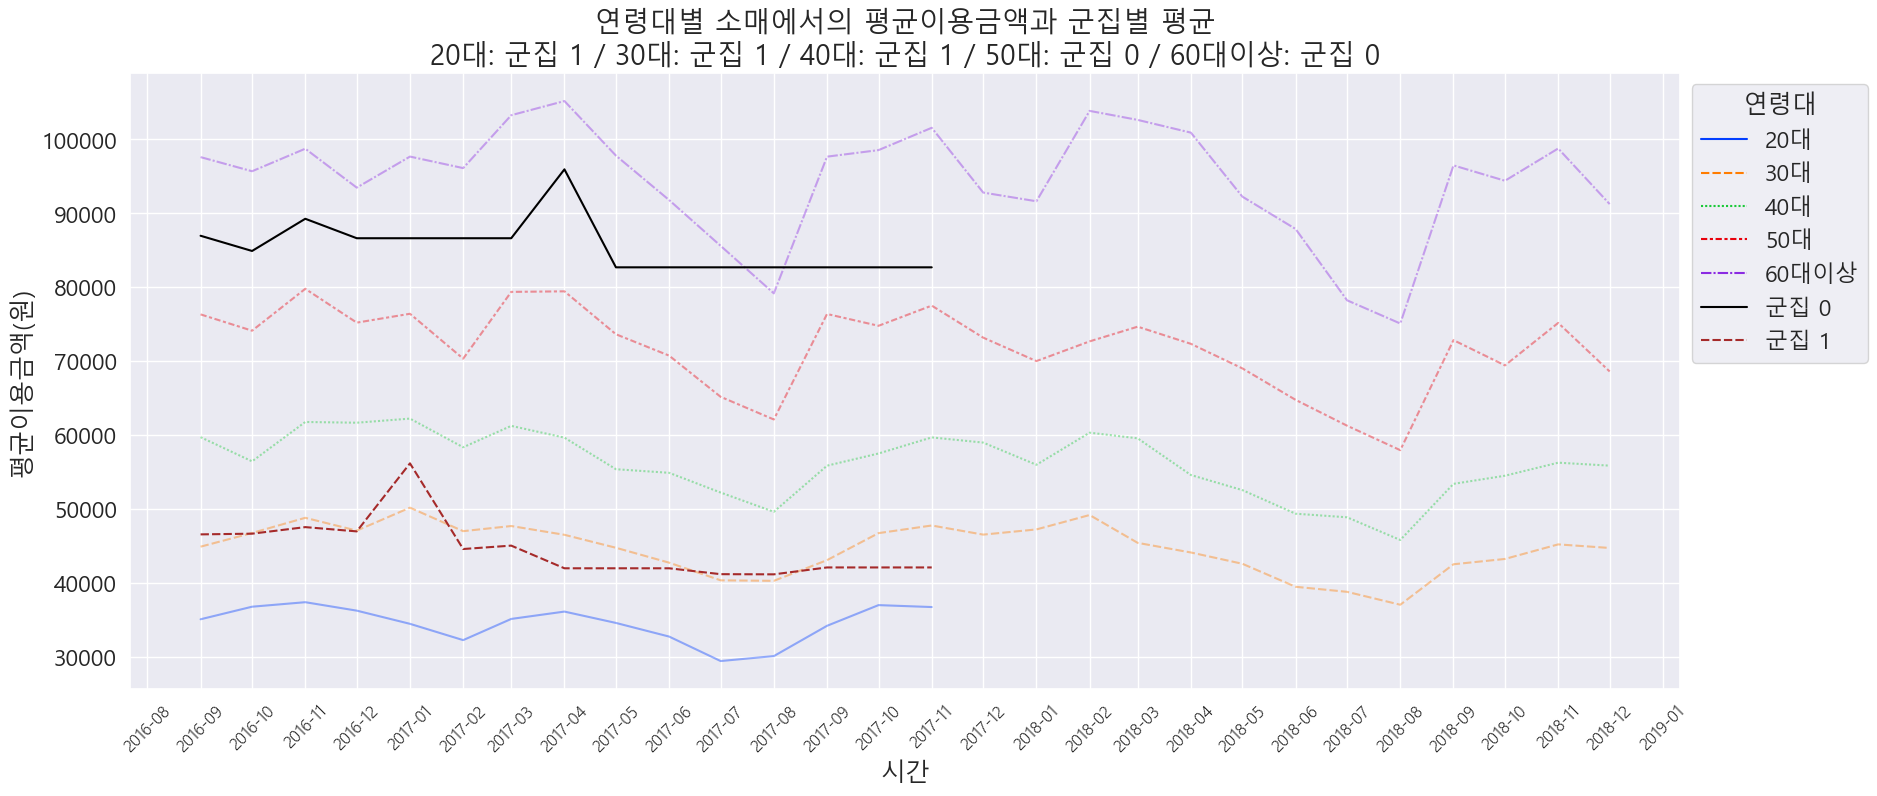

In [43]:
plot_market_agg(agg_DATA, marketType[2], km_list[2], pred_list[2])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


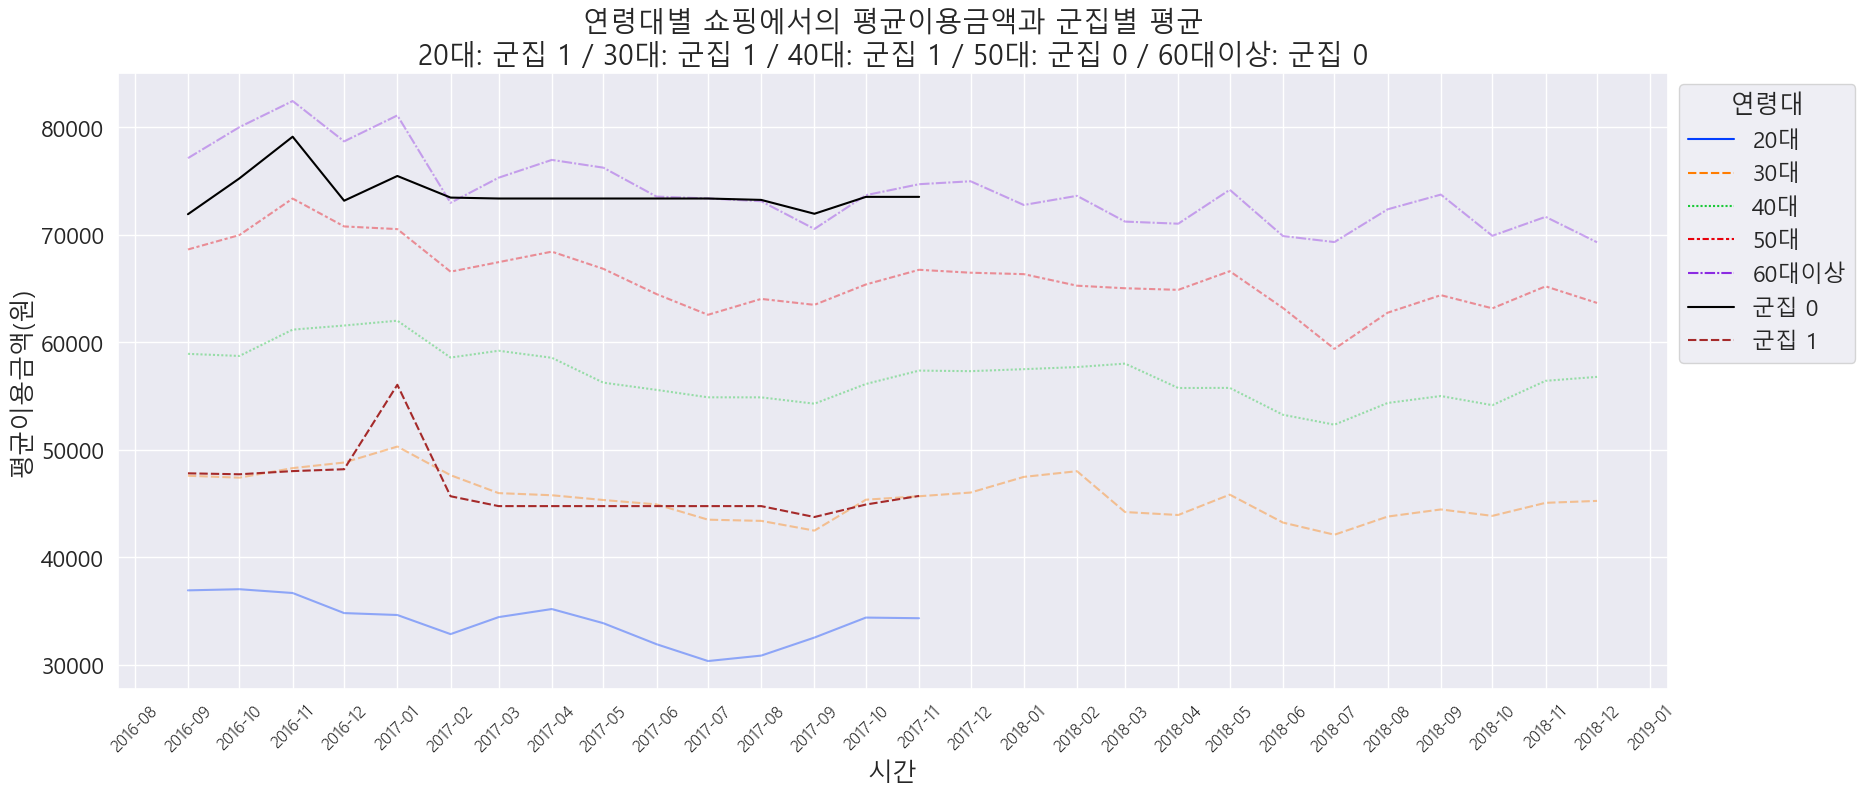

In [44]:
plot_market_agg(agg_DATA, marketType[3], km_list[3], pred_list[3])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


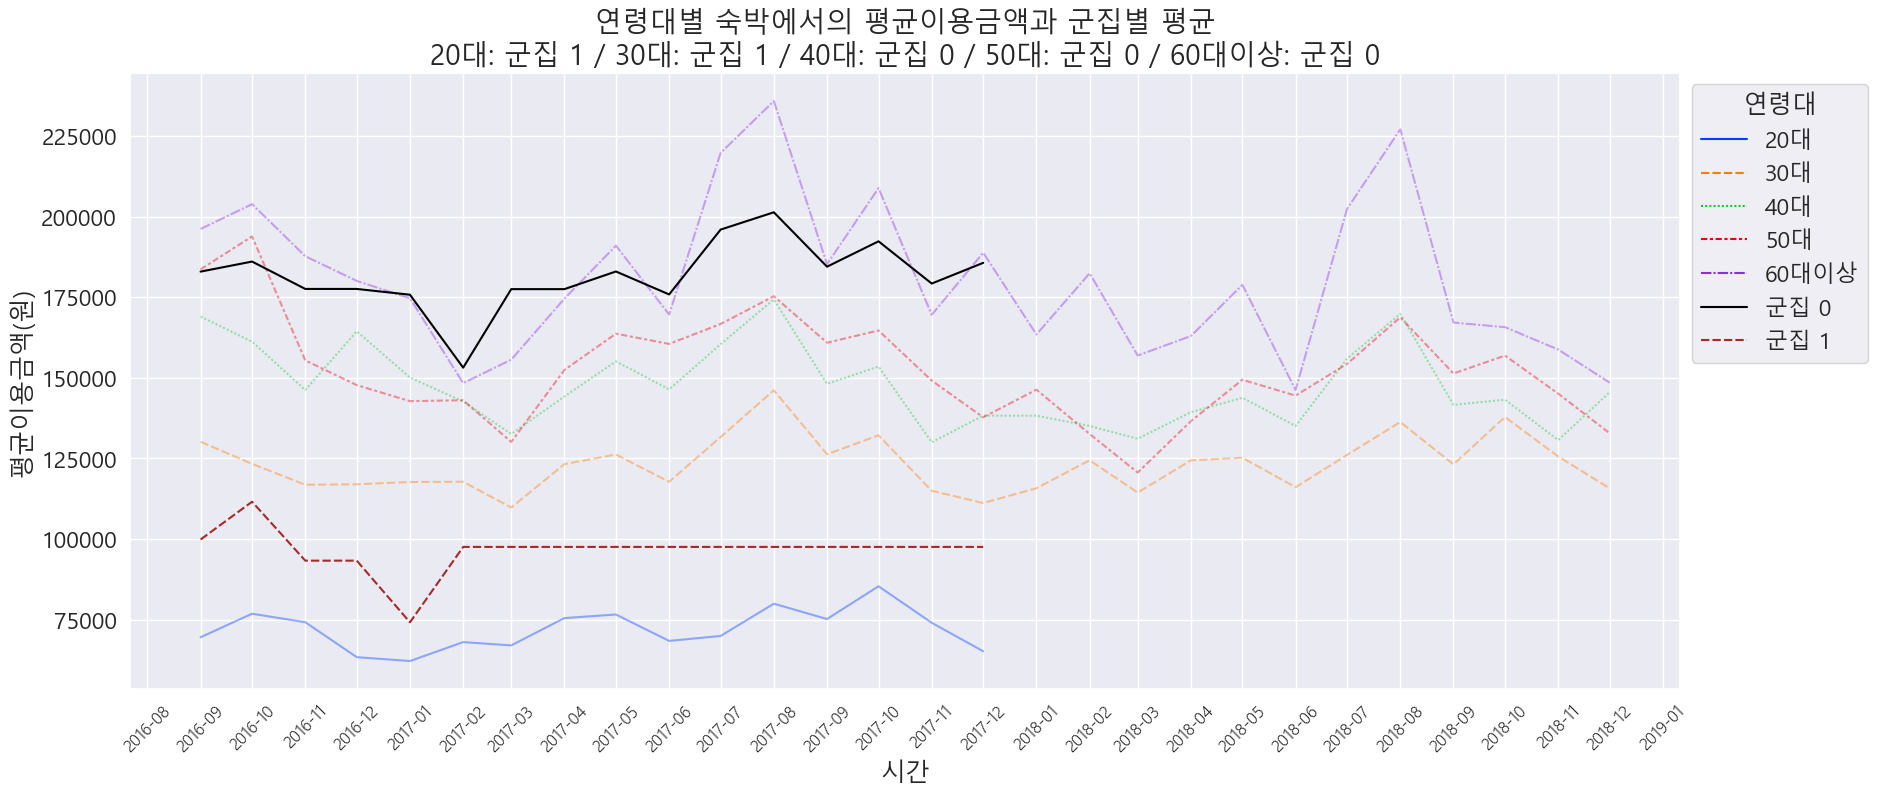

In [45]:
plot_market_agg(agg_DATA, marketType[4], km_list[4], pred_list[4])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


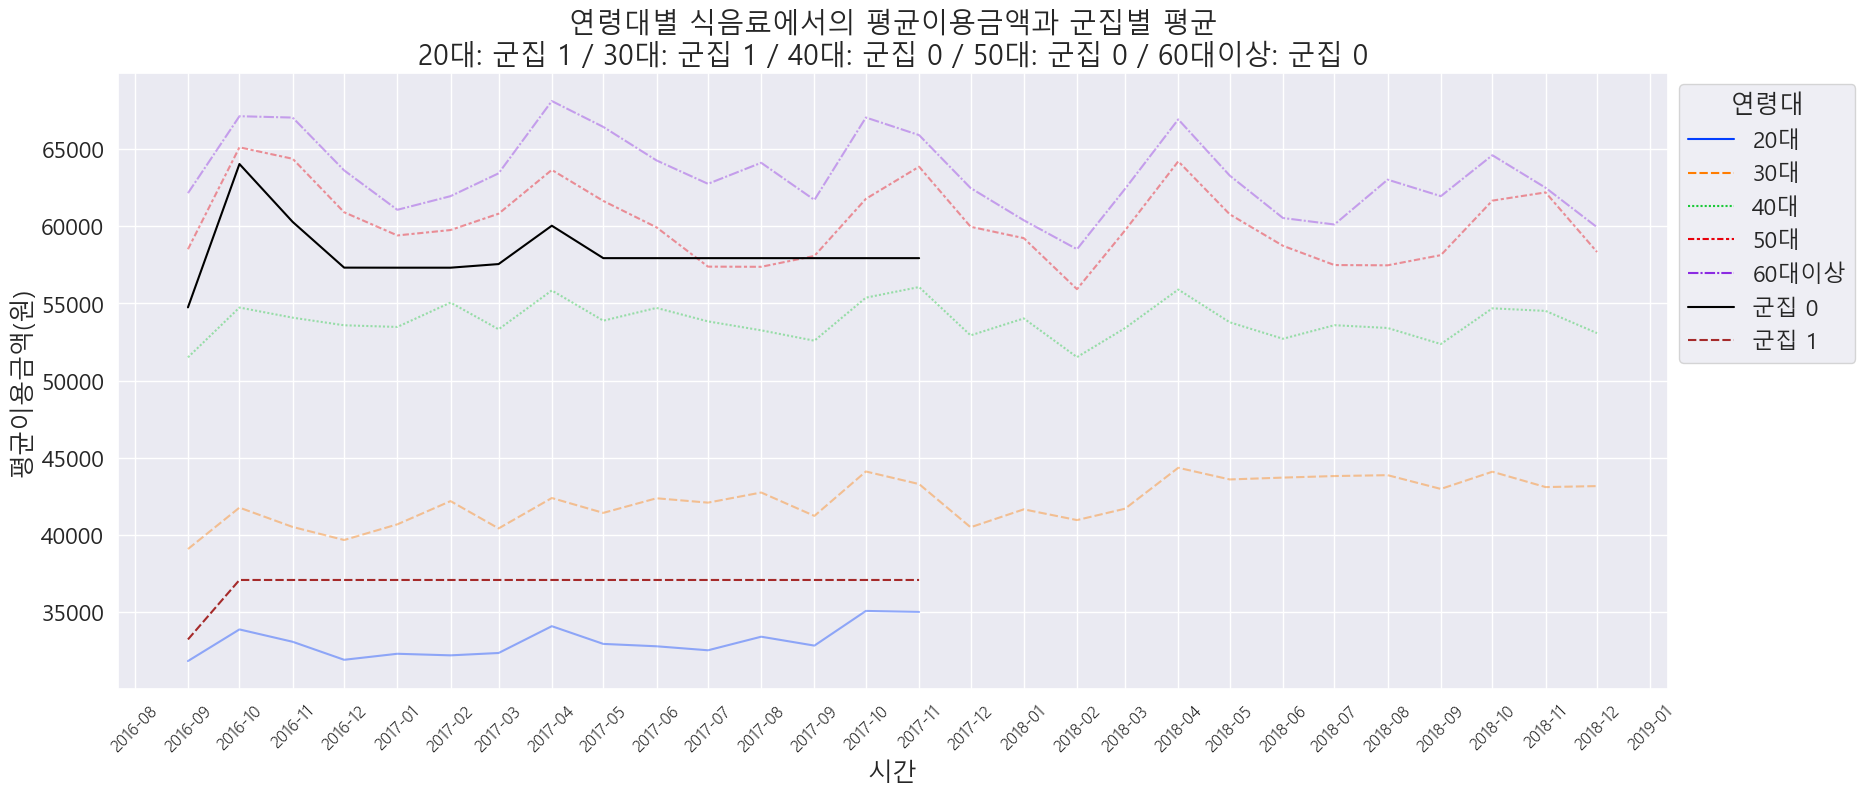

In [46]:
plot_market_agg(agg_DATA, marketType[5], km_list[5], pred_list[5])

C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",
C:\Users\user\AppData\Local\Temp\ipykernel_7128\801326507.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost",


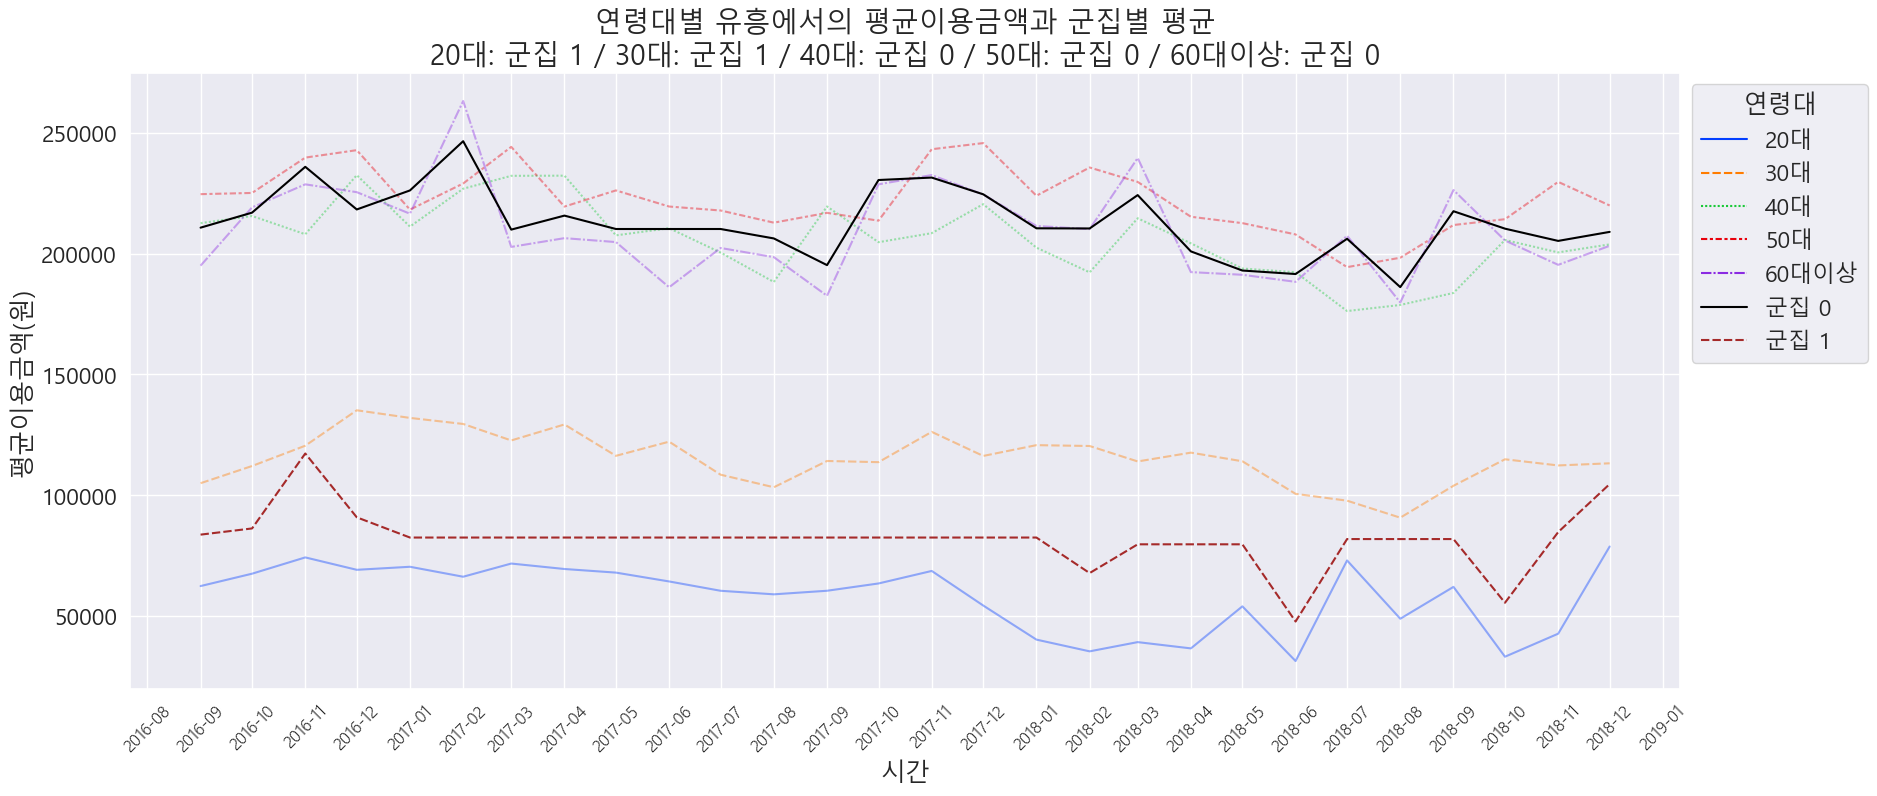

In [47]:
plot_market_agg(agg_DATA, marketType[6], km_list[6], pred_list[6])